# Data Analysis

## Installing packages

In [ ]:
!pip install ta

## Importing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ta
from statsmodels.tsa.seasonal import STL

## Loading data

In [28]:
btc_usdt_data = pd.read_csv('btc_6h.csv')

## Data preprocessing

In [29]:
btc_usdt_data['datetime'] = pd.to_datetime(btc_usdt_data['datetime'])
btc_usdt_data.set_index('datetime', inplace=True)
btc_usdt_data.head()

open      high       low     close       volume
datetime                                                                
2018-01-01 05:30:00  13715.65  13715.65  13155.38  13558.99  2421.241182
2018-01-01 11:30:00  13539.00  13818.55  13001.13  13220.56  1876.934392
2018-01-01 17:30:00  13220.56  13330.00  12750.00  13022.00  2427.898747
2018-01-01 23:30:00  13007.87  13599.70  12940.00  13380.00  1883.841523
2018-01-02 05:30:00  13382.16  13850.00  12890.02  13166.95  3957.954564

## Settting parameters for analysis

In [30]:
# Calculate Exponential Moving Average (EMA)
ema_span = 20  # Define the span for EMA
ema = btc_usdt_data['close'].ewm(span=ema_span).mean()

# Define weights for WMA (e.g., linearly increasing weights)
weights = pd.Series(range(1, len(btc_usdt_data) + 1))
wma_window = 20  # Define the window for WMA
wma = btc_usdt_data['close'].rolling(window=wma_window).apply(lambda prices: np.dot(prices, weights[-len(prices):]) / weights[-len(prices):].sum(), raw=True)

## Visualizing BTC-USDT data with different parameters

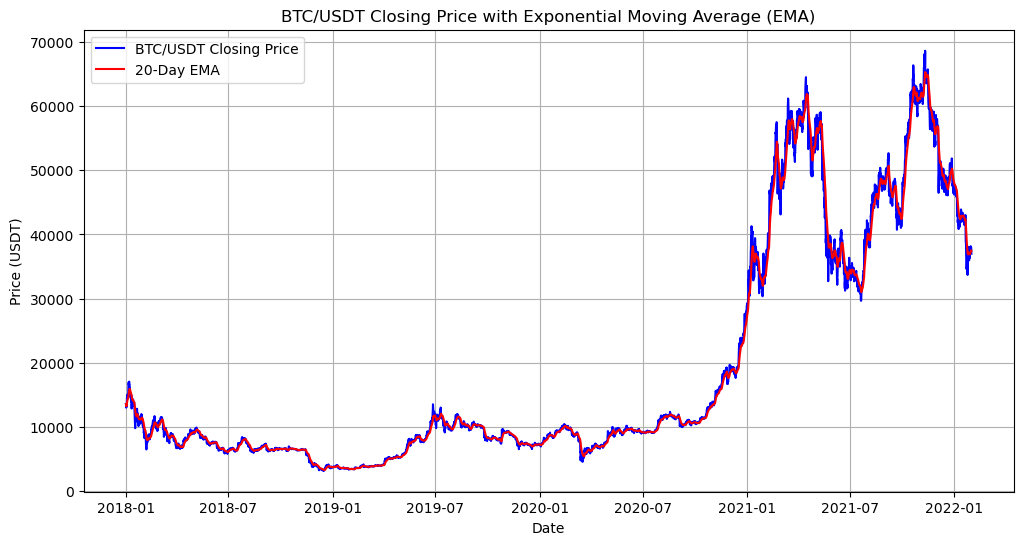

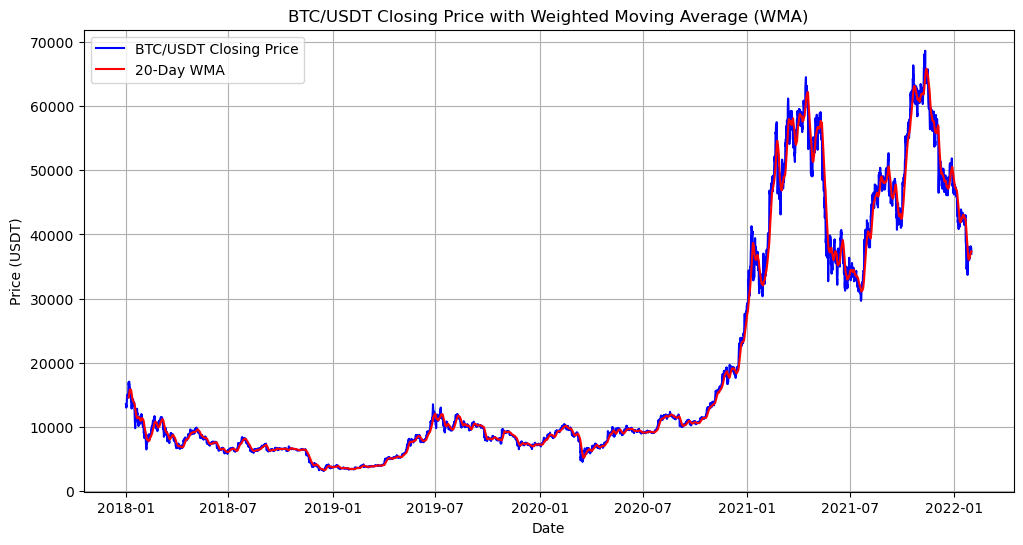

              close         volume
count   5959.000000    5959.000000
mean   18801.139626   13616.979970
std    17862.540801   10387.521301
min     3185.940000     750.084552
25%     7123.250000    7233.905716
50%     9536.880000   10873.472133
75%    32761.855000   16658.723685
max    68633.690000  162319.716490


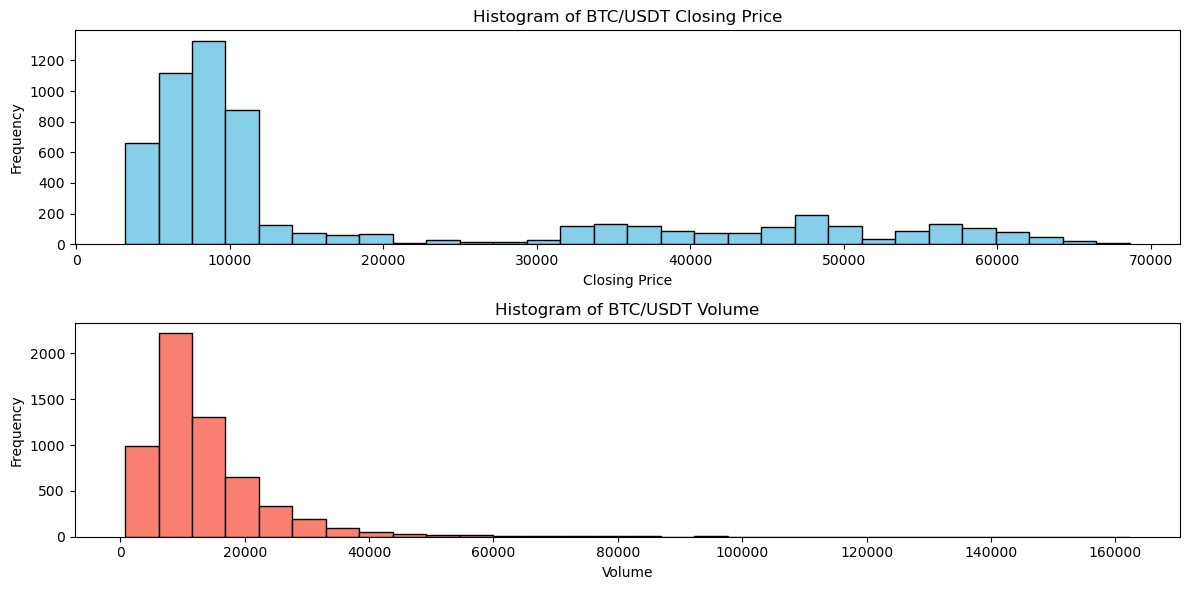

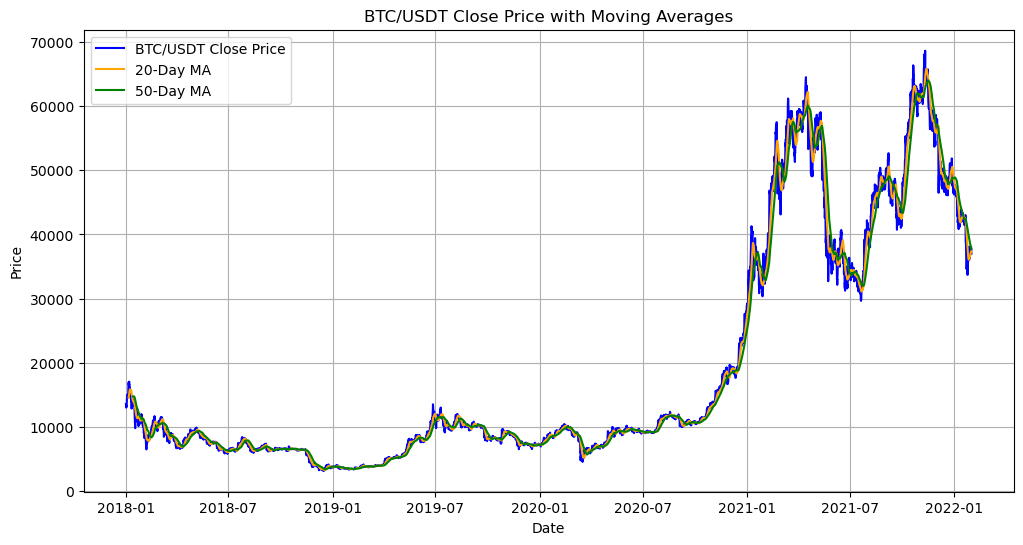

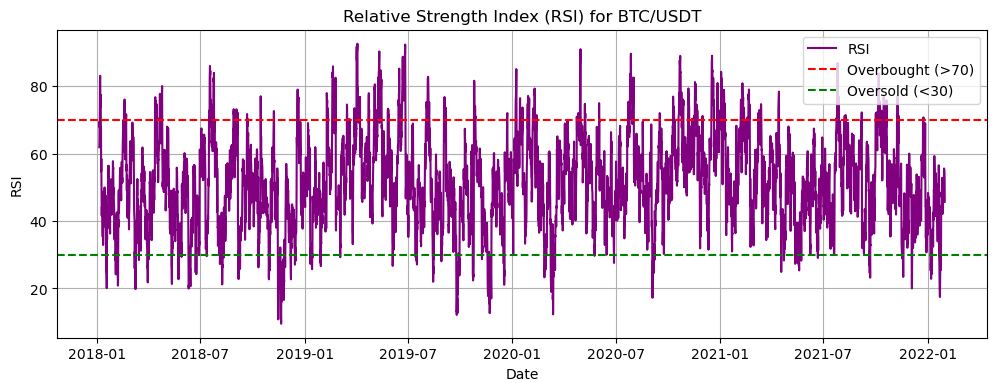

ValueError: too many values to unpack (expected 3)

In [31]:
#plotting BTC/USDT closing price with EMA
plt.figure(figsize=(12, 6))
plt.plot(btc_usdt_data.index, btc_usdt_data['close'], label='BTC/USDT Closing Price', color='blue')
plt.plot(ema.index, ema, label=f'{ema_span}-Day EMA', color='red')
plt.title('BTC/USDT Closing Price with Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting BTC/USDT closing price with WMA
plt.figure(figsize=(12, 6))
plt.plot(btc_usdt_data.index, btc_usdt_data['close'], label='BTC/USDT Closing Price', color='blue')
plt.plot(wma.index, wma, label=f'{wma_window}-Day WMA', color='red')
plt.title('BTC/USDT Closing Price with Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics for BTC/USDT closing price and volume
summary_stats = btc_usdt_data[['close', 'volume']].describe()
print(summary_stats)

# Histograms for BTC/USDT closing price and volume
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(btc_usdt_data['close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of BTC/USDT Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(btc_usdt_data['volume'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of BTC/USDT Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

btc_usdt_data['MA_20'] = ta.trend.sma_indicator(close=btc_usdt_data['close'], window=20)
btc_usdt_data['MA_50'] = ta.trend.sma_indicator(close=btc_usdt_data['close'], window=50)

plt.figure(figsize=(12, 6))
plt.plot(btc_usdt_data['close'], label='BTC/USDT Close Price', color='blue')
plt.plot(btc_usdt_data['MA_20'], label='20-Day MA', color='orange')
plt.plot(btc_usdt_data['MA_50'], label='50-Day MA', color='green')
plt.title('BTC/USDT Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot Relative Strength Index (RSI)
btc_usdt_data['RSI'] = ta.momentum.rsi(close=btc_usdt_data['close'], window=14)

plt.figure(figsize=(12, 4))
plt.plot(btc_usdt_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='r', linestyle='--', label='Overbought (>70)')
plt.axhline(30, color='g', linestyle='--', label='Oversold (<30)')
plt.title('Relative Strength Index (RSI) for BTC/USDT')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot Moving Average Convergence Divergence (MACD)
btc_usdt_data['MACD'], btc_usdt_data['MACD_signal'], _ = ta.trend.macd(close=btc_usdt_data['close'])

plt.figure(figsize=(12, 6))
plt.plot(btc_usdt_data['MACD'], label='MACD', color='blue')
plt.plot(btc_usdt_data['MACD_signal'], label='Signal Line', color='red')
plt.title('Moving Average Convergence Divergence (MACD) for BTC/USDT')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()


## Applying STL

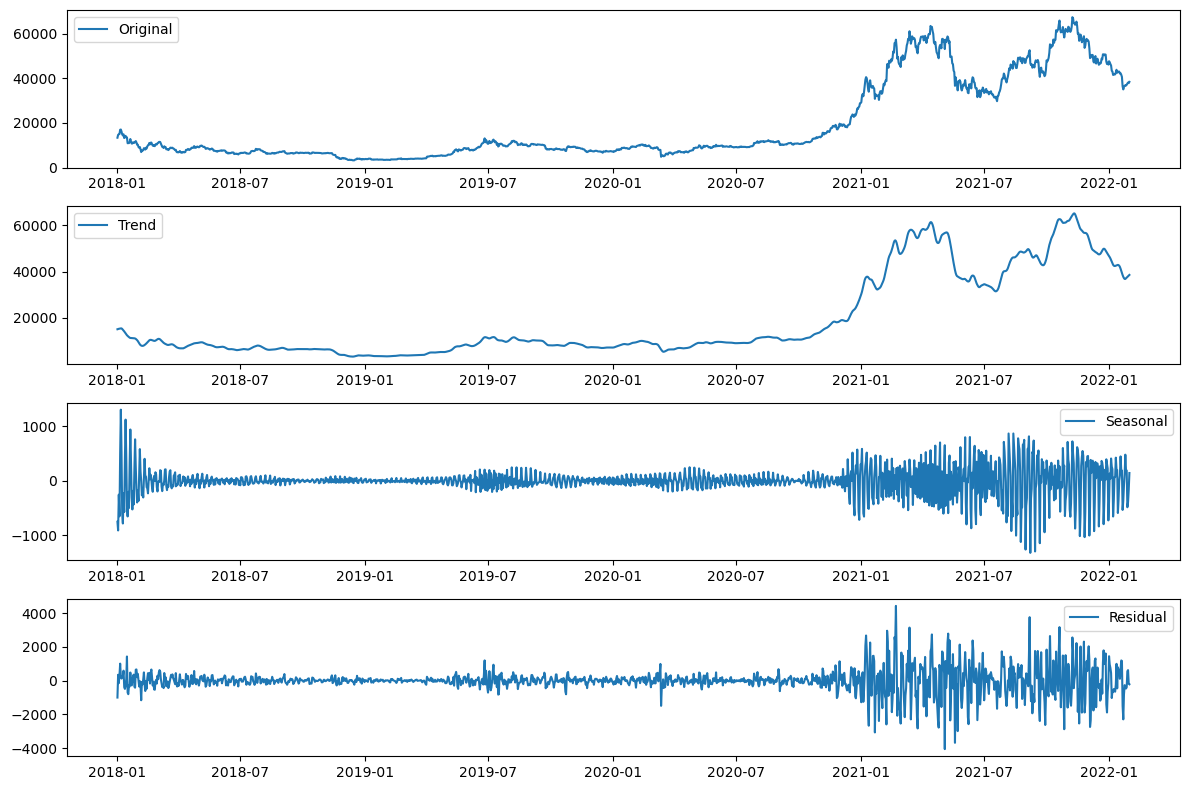

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the data
btc_historical_data = pd.read_csv('BTCUSDT_historical_data.csv')

# Convert the timestamp to index and set as datetime
btc_historical_data['timestamp'] = pd.to_datetime(btc_historical_data['timestamp'])
btc_historical_data.set_index('timestamp', inplace=True)

# Extract the closing price data
closing_price = btc_historical_data['close']

# Perform seasonal decomposition (STL decomposition)
stl = STL(closing_price, seasonal=13)  # Seasonal period assumed to be 13 (arbitrary)
result = stl.fit()

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(closing_price.index, closing_price, label='Original')
plt.legend()
plt.subplot(412)
plt.plot(result.trend.index, result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal.index, result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid.index, result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


## Plotting Bollinger Bands

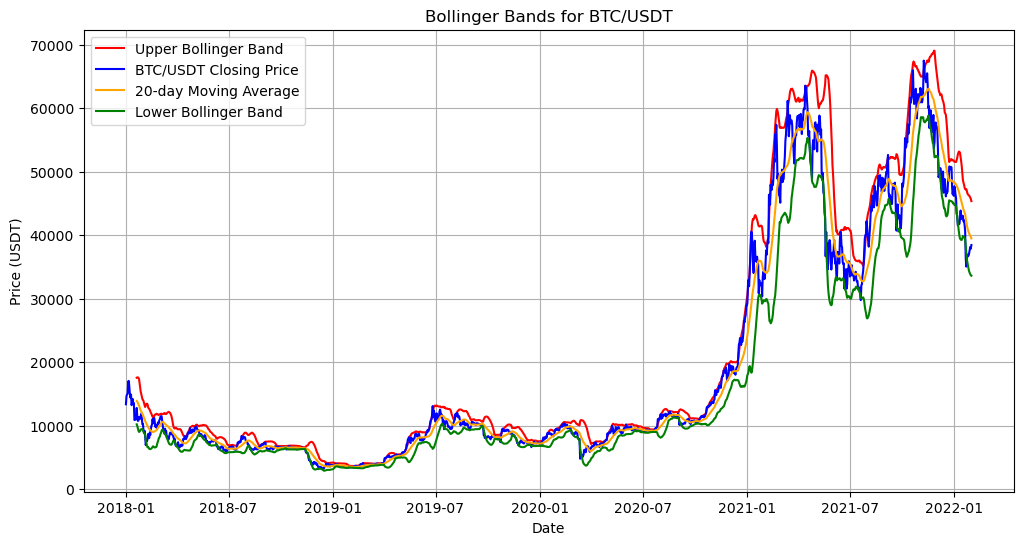

In [42]:
# Calculate 20-day moving average and standard deviation

btc_usdt_data['20MA'] = btc_usdt_data['close'].rolling(window=20).mean()
btc_usdt_data['20STD'] = btc_usdt_data['close'].rolling(window=20).std()

# Calculate Bollinger Bands
btc_usdt_data['Upper_Band'] = btc_usdt_data['20MA'] + (btc_usdt_data['20STD'] * 2)
btc_usdt_data['Lower_Band'] = btc_usdt_data['20MA'] - (btc_usdt_data['20STD'] * 2)

# Plotting Bollinger Bands
plt.figure(figsize=(12, 6))

plt.plot(btc_usdt_data['Upper_Band'], label='Upper Bollinger Band', color='red')
plt.plot(btc_usdt_data['close'], label='BTC/USDT Closing Price', color='blue')
plt.plot(btc_usdt_data['20MA'], label='20-day Moving Average', color='orange')
plt.plot(btc_usdt_data['Lower_Band'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for BTC/USDT')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

## Plotting On-Balance Volume (OBV)

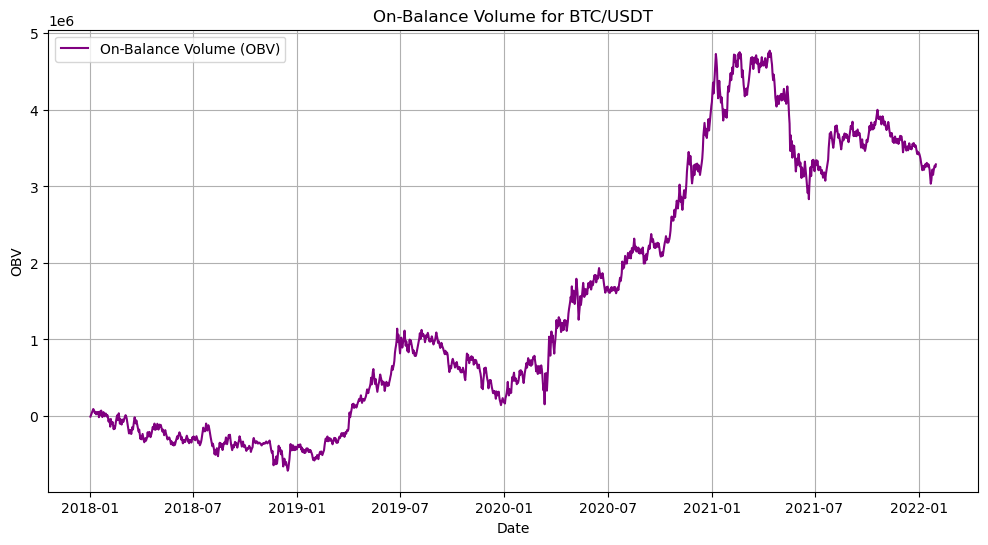

In [43]:
# Calculate On-Balance Volume (OBV)
btc_usdt_data['Daily_Return'] = btc_usdt_data['close'].pct_change()
btc_usdt_data['OBV'] = (btc_usdt_data['Daily_Return'].apply(lambda x: 1 if x > 0 else -1) * btc_usdt_data['volume']).cumsum()

# Plotting On-Balance Volume (OBV)
plt.figure(figsize=(12, 6))
plt.plot(btc_usdt_data.index, btc_usdt_data['OBV'], label='On-Balance Volume (OBV)', color='purple')
plt.title('On-Balance Volume for BTC/USDT')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing the correlation matrix

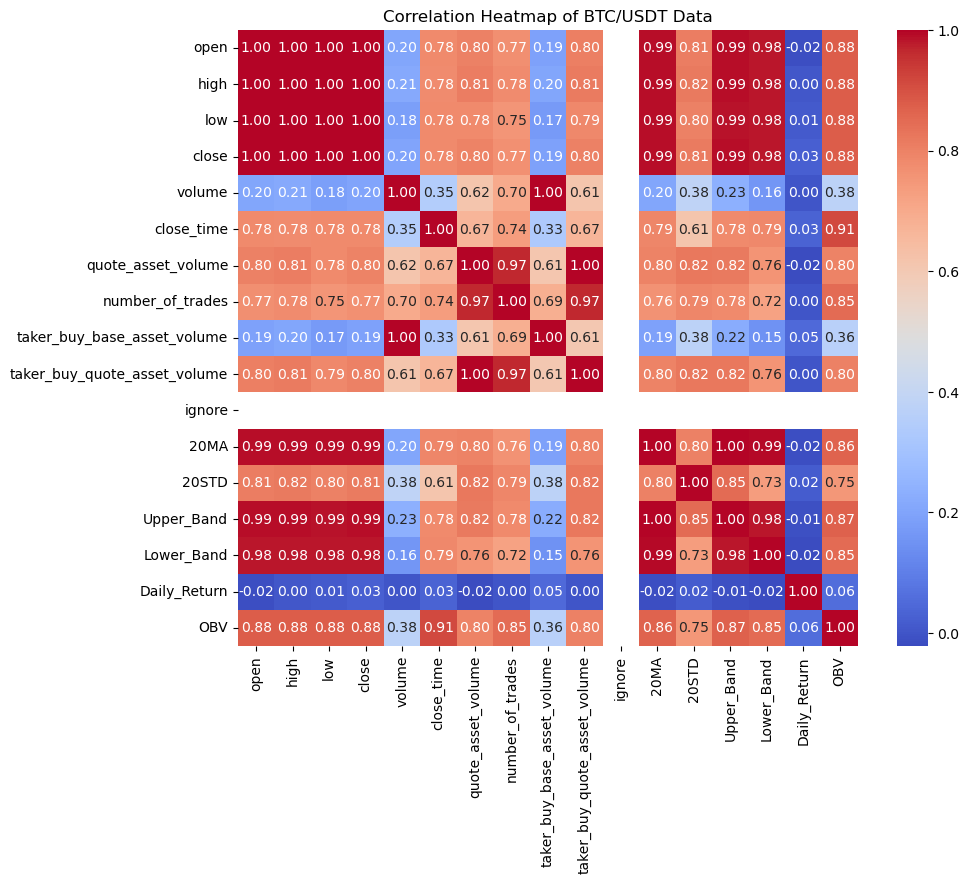

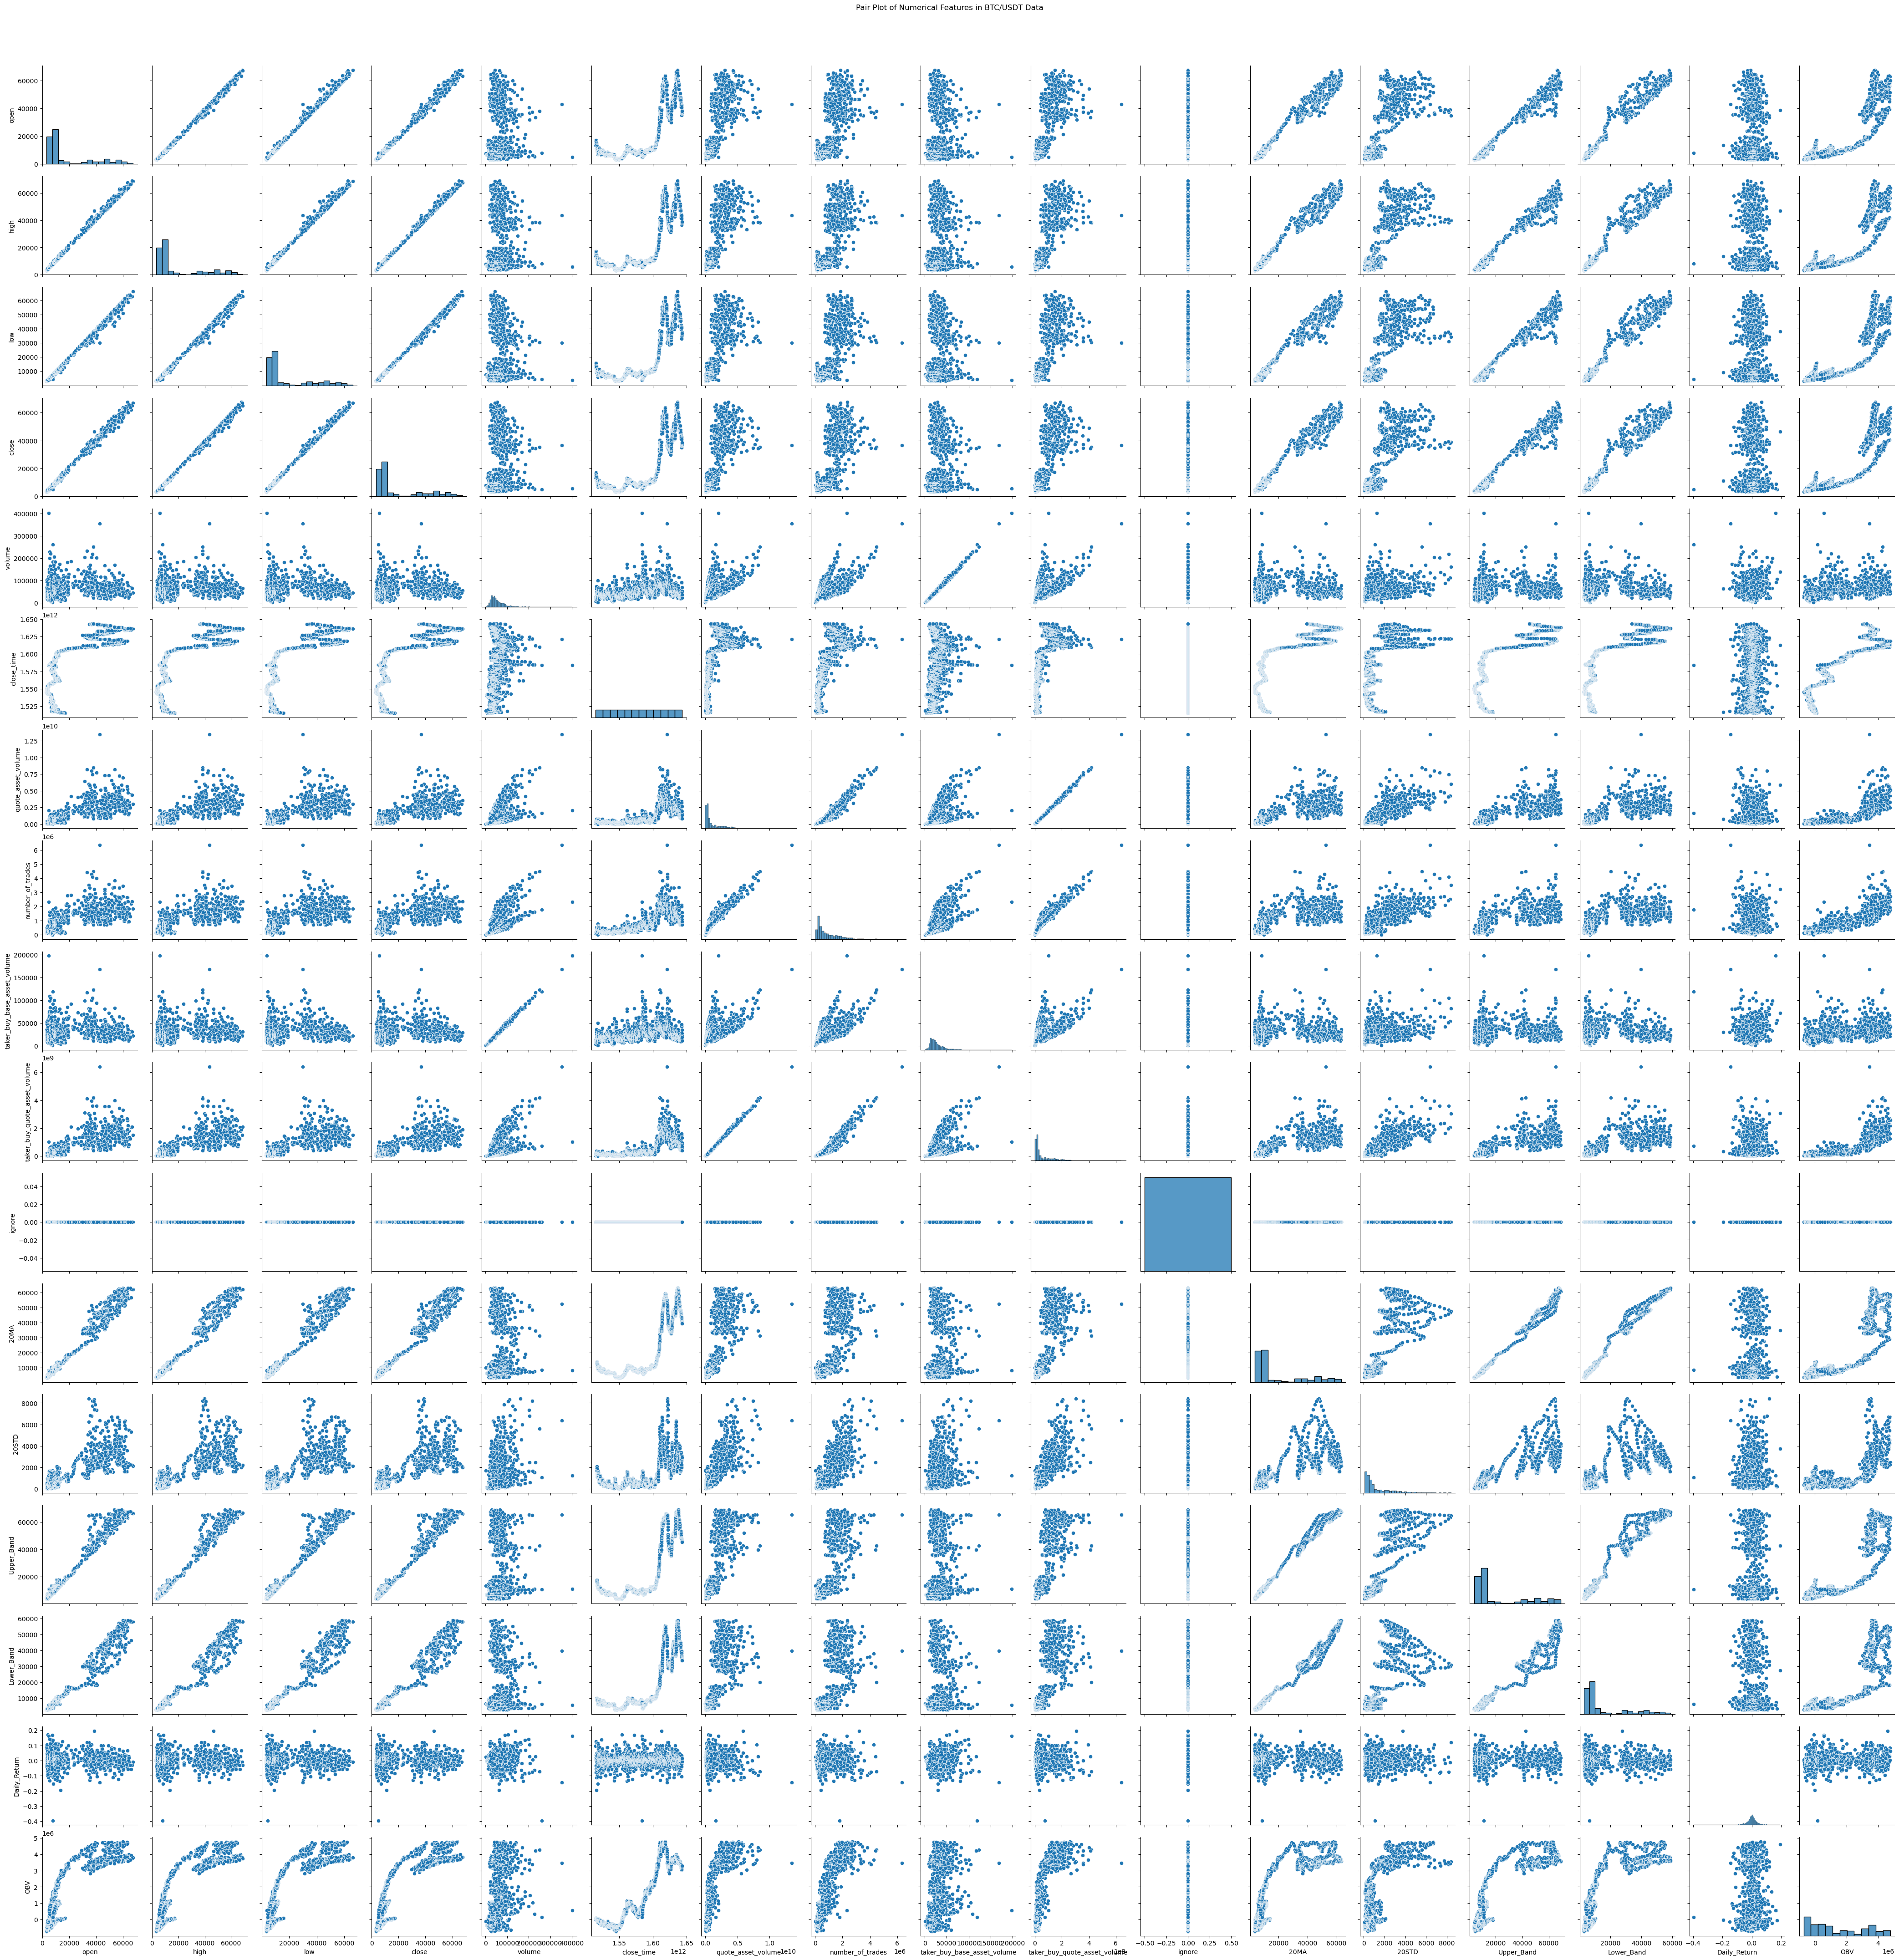

In [44]:
correlation_matrix = btc_usdt_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of BTC/USDT Data')
plt.show()

# Select numerical columns for the pair plot
numerical_columns = btc_usdt_data.select_dtypes(include='number')

# Create a pair plot
sns.pairplot(numerical_columns)
plt.suptitle('Pair Plot of Numerical Features in BTC/USDT Data', y=1.02)
plt.show()

## Analyzing ACF and PCF

<Figure size 1200x600 with 0 Axes>

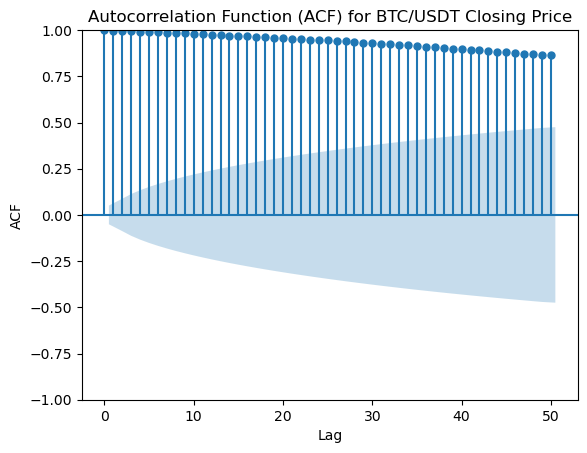

C:\Users\Aditya Jha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

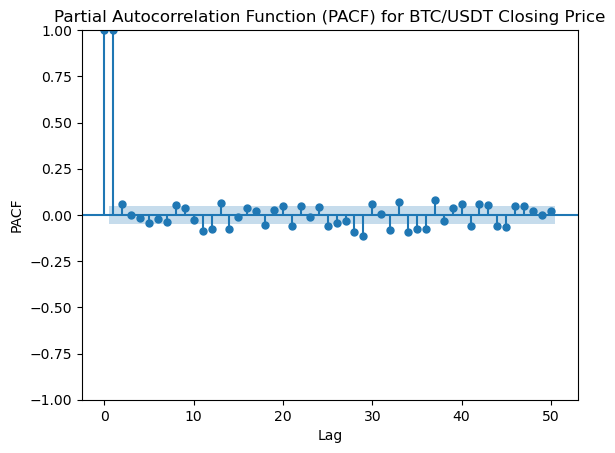

In [45]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(closing_price, lags=50, title='Autocorrelation Function (ACF) for BTC/USDT Closing Price')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(closing_price, lags=50, title='Partial Autocorrelation Function (PACF) for BTC/USDT Closing Price')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


# Training the Model


Epoch 1/100

4131/4131 - 12s - loss: 0.0015 - val_loss: 0.0432 - 12s/epoch - 3ms/step
Epoch 2/100
4131/4131 - 10s - loss: 0.0015 - val_loss: 0.0530 - 10s/epoch - 3ms/step
Epoch 3/100
4131/4131 - 10s - loss: 0.0015 - val_loss: 0.0399 - 10s/epoch - 3ms/step
Epoch 4/100
4131/4131 - 10s - loss: 0.0014 - val_loss: 0.0719 - 10s/epoch - 3ms/step
Epoch 5/100
4131/4131 - 11s - loss: 0.0014 - val_loss: 0.0773 - 11s/epoch - 3ms/step
Epoch 6/100
4131/4131 - 10s - loss: 0.0014 - val_loss: 0.0696 - 10s/epoch - 2ms/step
Epoch 7/100
4131/4131 - 6s - loss: 0.0013 - val_loss: 0.0625 - 6s/epoch - 2ms/step
Epoch 8/100
4131/4131 - 6s - loss: 0.0014 - val_loss: 0.1063 - 6s/epoch - 1ms/step
55/55 [==============================] - 0s 1ms/step
Train Score: 983.46 RMSE
Test Score: 13077.43 RMSE


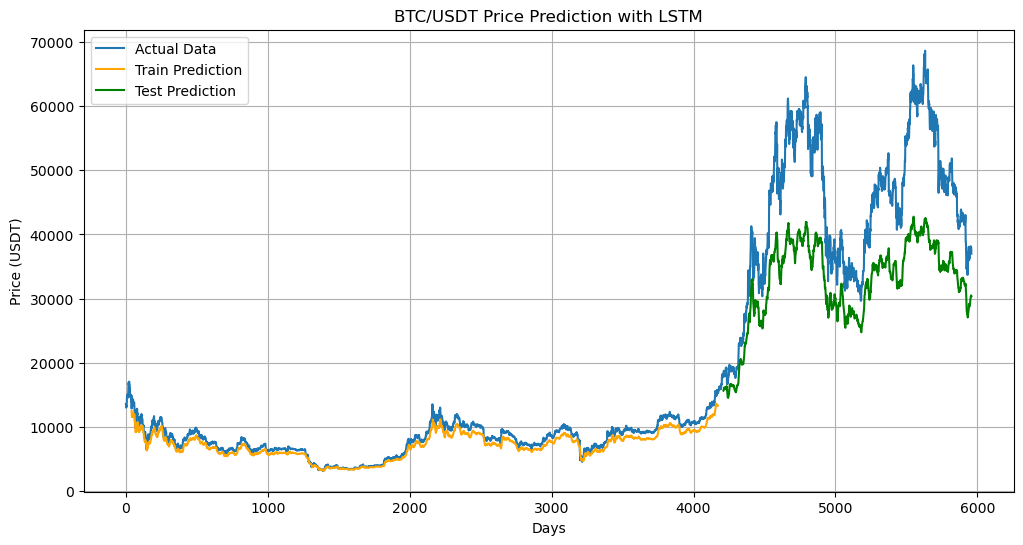

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_6h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Define a function to prepare the dataset for training/testing
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 40

# Prepare the dataset
train_size = int(len(closing_price_normalized) * 0.7)  # 70% for training, 30% for testing
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dropout(0.2))  # Adding dropout layer
model.compile(loss='mean_squared_error', optimizer='adam')
# Implement early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_data=(testX, testY), callbacks=[early_stopping])

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(closing_price_normalized)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closing_price_normalized)
testPredictPlot[:, :] = np.nan
testPredictPlot[-1748:, :] = testPredict

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(closing_price_normalized), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction', color='orange')
plt.plot(testPredictPlot, label='Test Prediction', color='green')
plt.title('BTC/USDT Price Prediction with LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_6h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Define a higher training data ratio
train_ratio = 0.85  # 80% for training, 20% for testing

# Determine the size of the training data based on the ratio
train_size = int(len(closing_price_normalized) * train_ratio)

# Split the data into training and testing sets
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

# Define a function to prepare the dataset for training/testing
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 15

# Prepare the dataset with the new training and testing sets
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dropout(0.2))  # Adding dropout layer
model.compile(loss='mean_squared_error', optimizer='adam')
# Implement early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(closing_price_normalized)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

Epoch 1/100
5050/5050 - 7s - loss: 0.0149 - 7s/epoch - 1ms/step
Epoch 2/100
5050/5050 - 6s - loss: 0.0150 - 6s/epoch - 1ms/step
Epoch 3/100
5050/5050 - 6s - loss: 0.0148 - 6s/epoch - 1ms/step
Epoch 4/100
5050/5050 - 6s - loss: 0.0137 - 6s/epoch - 1ms/step
Epoch 5/100
5050/5050 - 6s - loss: 0.0159 - 6s/epoch - 1ms/step
Epoch 6/100
5050/5050 - 6s - loss: 0.0146 - 6s/epoch - 1ms/step
Epoch 7/100
5050/5050 - 5s - loss: 0.0146 - 5s/epoch - 1ms/step
Epoch 8/100
5050/5050 - 5s - loss: 0.0149 - 5s/epoch - 1ms/step
Epoch 9/100
5050/5050 - 5s - loss: 0.0146 - 5s/epoch - 1ms/step
Epoch 10/100
5050/5050 - 6s - loss: 0.0134 - 6s/epoch - 1ms/step
Epoch 11/100
5050/5050 - 6s - loss: 0.0144 - 6s/epoch - 1ms/step
Epoch 12/100
5050/5050 - 5s - loss: 0.0126 - 5s/epoch - 1ms/step
Epoch 13/100
5050/5050 - 5s - loss: 0.0150 - 5s/epoch - 1ms/step
Epoch 14/100
5050/5050 - 6s - loss: 0.0143 - 6s/epoch - 1ms/step
Epoch 15/100
5050/5050 - 5s - loss: 0.0124 - 5s/epoch - 1ms/step
Epoch 16/100
5050/5050 - 6s - loss

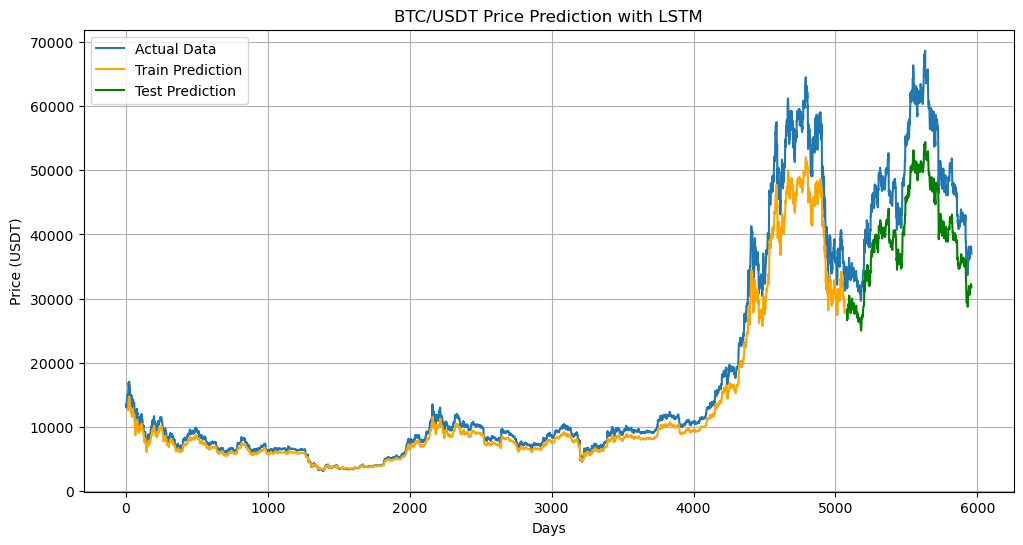

In [49]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(closing_price_normalized)
testPredictPlot[:, :] = np.nan
testPredictPlot[-879:, :] = testPredict

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(closing_price_normalized), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction', color='orange')
plt.plot(testPredictPlot, label='Test Prediction', color='green')
plt.title('BTC/USDT Price Prediction with LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

## Zoomed in 

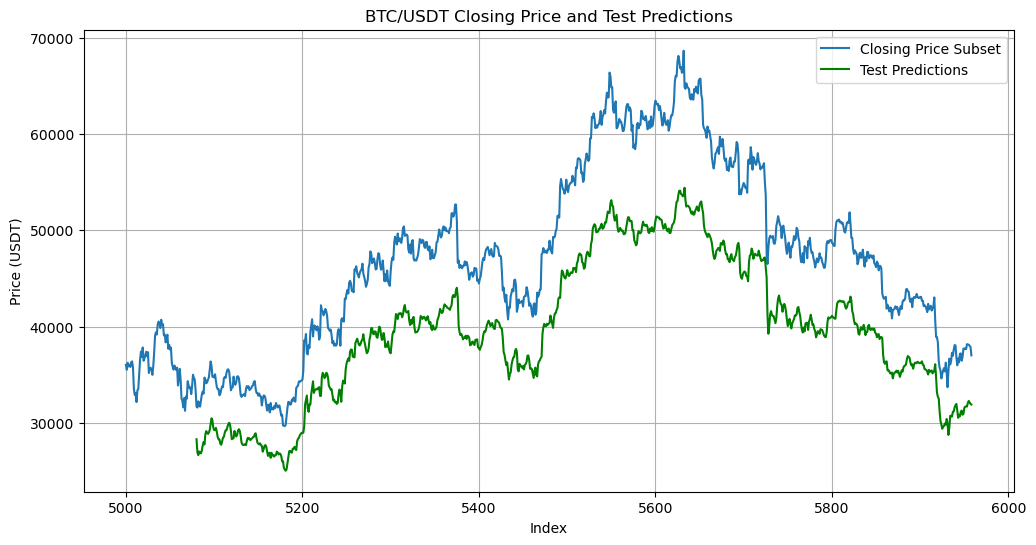

In [50]:
# Define the start index
start_index = 5000

# Extract the closing price from the start index to the end of the dataframe
closing_price_subset = btc_usdt_data['close'].iloc[start_index:]

# Plot the subset of the closing price data along with test predictions
plt.figure(figsize=(12, 6))
plt.plot(closing_price_subset, label='Closing Price Subset')
plt.plot(np.arange(len(trainPredict) + 2 * look_back, len(closing_price_normalized)), testPredict, label='Test Predictions', color='green')

plt.title('BTC/USDT Closing Price and Test Predictions')
plt.xlabel('Index')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

## LSTM with Dense Layers

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_6h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Define a function to prepare the dataset for training/testing
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 10

# Prepare the dataset
train_size = int(len(closing_price_normalized) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build the LSTM model with dense layers
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(closing_price_normalized), label='Actual Data')
plt.plot(np.concatenate([trainPredict, testPredict]), label='Predictions', color='orange')
plt.title('BTC/USDT Price Prediction with LSTM and Dense Layers')
plt.xlabel('Days')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
149/149 - 3s - loss: 0.0024 - 3s/epoch - 22ms/step
Epoch 2/100


KeyboardInterrupt: 

##  Gated Recurrent Unit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_6h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Define a function to prepare the dataset for training/testing
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 10

# Prepare the dataset
train_size = int(len(closing_price_normalized) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build the GRU model
model = Sequential()
model.add(GRU(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(closing_price_normalized), label='Actual Data')
plt.plot(np.concatenate([trainPredict, testPredict]), label='Predictions', color='orange')
plt.title('BTC/USDT Price Prediction with GRU')
plt.xlabel('Days')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()


## GRU with Dense Layer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_4h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Define a function to prepare the dataset for training/testing
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 10

# Prepare the dataset
train_size = int(len(closing_price_normalized) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build the GRU model with dense layers
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(look_back, 1)))

model.add(GRU(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(closing_price_normalized), label='Actual Data')
plt.plot(np.concatenate([trainPredict, testPredict]), label='Predictions', color='orange')
plt.title('BTC/USDT Price Prediction with GRU and Dense Layers')
plt.xlabel('Days')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

## CNN with LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_6h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Define a function to prepare the dataset for training/testing
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 10

# Prepare the dataset
train_size = int(len(closing_price_normalized) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(closing_price_normalized), label='Actual Data')
plt.plot(np.concatenate([trainPredict, testPredict]), label='Predictions', color='orange')
plt.title('BTC/USDT Price Prediction with CNN-LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show() 

## GRU and LSTM Ensemble

Epoch 1/100
892/892 - 7s - loss: 6.0312e-04 - 7s/epoch - 8ms/step
Epoch 2/100
892/892 - 4s - loss: 2.6890e-05 - 4s/epoch - 5ms/step
Epoch 3/100
892/892 - 5s - loss: 2.6749e-05 - 5s/epoch - 5ms/step
Epoch 4/100
892/892 - 5s - loss: 2.4926e-05 - 5s/epoch - 6ms/step
Epoch 5/100
892/892 - 5s - loss: 1.9842e-05 - 5s/epoch - 5ms/step
Epoch 6/100
892/892 - 5s - loss: 1.8188e-05 - 5s/epoch - 5ms/step
Epoch 7/100
892/892 - 5s - loss: 1.7412e-05 - 5s/epoch - 6ms/step
Epoch 8/100
892/892 - 5s - loss: 1.4536e-05 - 5s/epoch - 5ms/step
Epoch 9/100
892/892 - 5s - loss: 1.5680e-05 - 5s/epoch - 5ms/step
Epoch 10/100
892/892 - 5s - loss: 1.1830e-05 - 5s/epoch - 6ms/step
Epoch 11/100
892/892 - 5s - loss: 1.2152e-05 - 5s/epoch - 6ms/step
Epoch 12/100
892/892 - 4s - loss: 1.0202e-05 - 4s/epoch - 5ms/step
Epoch 13/100
892/892 - 5s - loss: 9.2869e-06 - 5s/epoch - 5ms/step
Epoch 14/100
892/892 - 4s - loss: 9.1413e-06 - 4s/epoch - 5ms/step
Epoch 15/100
892/892 - 4s - loss: 8.8328e-06 - 4s/epoch - 5ms/step
Epoc

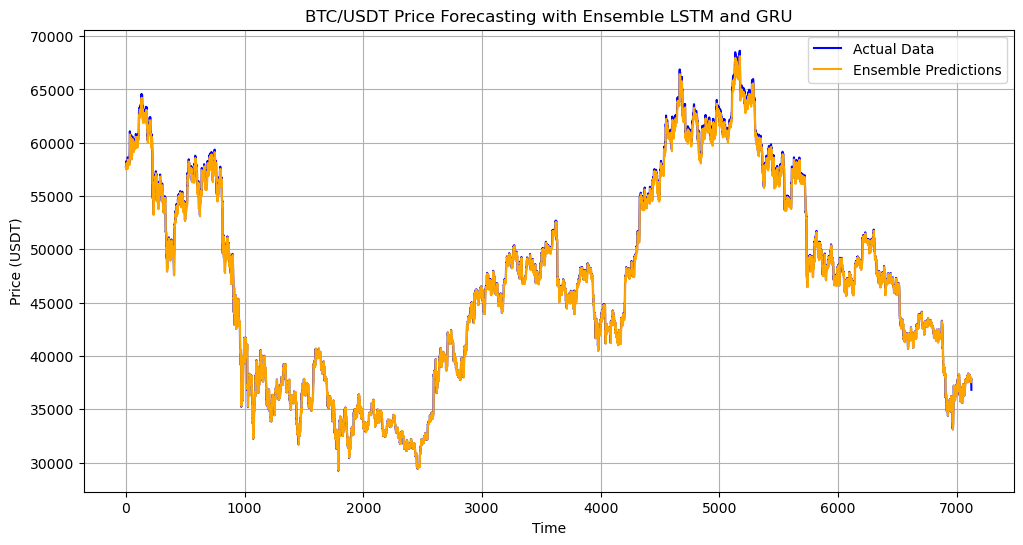

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error

# Load the data
btc_usdt_data = pd.read_csv('btc_1h.csv')

# Extract the closing price
closing_price = btc_usdt_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price_normalized = scaler.fit_transform(closing_price)

# Function to prepare dataset for modeling
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Set the look-back (time steps to look back for prediction)
look_back = 10

# Prepare the dataset for LSTM model
train_size = int(len(closing_price_normalized) * 0.8)
train_data, test_data = closing_price_normalized[0:train_size], closing_price_normalized[train_size:]

trainX_lstm, trainY_lstm = create_dataset(train_data, look_back)
testX_lstm, testY_lstm = create_dataset(test_data, look_back)

trainX_lstm = np.reshape(trainX_lstm, (trainX_lstm.shape[0], trainX_lstm.shape[1], 1))
testX_lstm = np.reshape(testX_lstm, (testX_lstm.shape[0], testX_lstm.shape[1], 1))

# Prepare the dataset for GRU model
trainX_gru, trainY_gru = create_dataset(train_data, look_back)
testX_gru, testY_gru = create_dataset(test_data, look_back)

trainX_gru = np.reshape(trainX_gru, (trainX_gru.shape[0], trainX_gru.shape[1], 1))
testX_gru = np.reshape(testX_gru, (testX_gru.shape[0], testX_gru.shape[1], 1))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX_lstm, trainY_lstm, epochs=100, batch_size=32, verbose=2)

# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(look_back, 1)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(trainX_gru, trainY_gru, epochs=100, batch_size=32, verbose=2)

# Make predictions using both models
lstm_predictions = model_lstm.predict(testX_lstm)
gru_predictions = model_gru.predict(testX_gru)

# Ensemble predictions (simple averaging)
ensemble_predictions = (lstm_predictions + gru_predictions) / 2

# Invert predictions to original scale
testPredict_lstm = scaler.inverse_transform(lstm_predictions)
testY_lstm = scaler.inverse_transform([testY_lstm])
testPredict_gru = scaler.inverse_transform(gru_predictions)
testY_gru = scaler.inverse_transform([testY_gru])
testPredict_ensemble = scaler.inverse_transform(ensemble_predictions)

# Calculate root mean squared error for each model and ensemble
testScore_lstm = np.sqrt(mean_squared_error(testY_lstm[0], testPredict_lstm[:, 0]))
print('LSTM Test Score: %.2f RMSE' % (testScore_lstm))

testScore_gru = np.sqrt(mean_squared_error(testY_gru[0], testPredict_gru[:, 0]))
print('GRU Test Score: %.2f RMSE' % (testScore_gru))

testScore_ensemble = np.sqrt(mean_squared_error(testY_gru[0], testPredict_ensemble[:, 0]))
print('Ensemble Test Score: %.2f RMSE' % (testScore_ensemble))

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(testY_gru.flatten(), label='Actual Data', color='blue')
plt.plot(testPredict_ensemble.flatten(), label='Ensemble Predictions', color='orange')
plt.title('BTC/USDT Price Forecasting with Ensemble LSTM and GRU')
plt.xlabel('Time')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
PREDICTED_DATA = testPredict_ensemble

# Backtesting

## Strategy #1

## Setting the parameters

In [112]:
SMA_PERIOD_SHORT = 50
SMA_PERIOD_LONG = 200
RSI_PERIOD = 14
RSI_OVERBOUGHT = 14
RSI_OVERSOLD = 30
MACD_SHORT = 12
MACD_LONG = 26
MACD_SIGNAL = 9
ATR_PERIOD = 14
ADX_PERIOD = 14
BBAND_PERIOD = 20
BBAND_DEV = 1.2

## Adding our predicted values to the data set

In [108]:
data = pd.read_csv('btc_1h.csv', index_col='datetime', parse_dates=True)
data = data.iloc[-len(PREDICTED_DATA):]

In [105]:
data['close'] = PREDICTED_DATA

data.head()

open      high       low         close       volume
datetime                                                                    
2021-04-09 00:30:00  57899.98  58000.00  57617.04  57655.046875  1320.715876
2021-04-09 01:30:00  57732.53  57824.49  57575.34  57499.031250  1374.895109
2021-04-09 02:30:00  57674.18  57750.00  57449.04  57440.781250  1033.366107
2021-04-09 03:30:00  57669.69  58100.00  57569.80  57432.546875  1330.053092
2021-04-09 04:30:00  57916.30  58099.27  57729.63  57670.941406  1094.389631

## Strategy class using RSI, MACD, ATR and ADX

In [120]:
import backtrader as bt
import pandas as pd
import numpy as np
import backtrader.analyzers as btanalyzers
from backtrader.analyzers import AnnualReturn

# Load BTC/USDT data
data = pd.read_csv('btc_5m.csv', index_col='datetime', parse_dates=True)
data = data.rename(columns={"open": "Open", "high": "High", "low": "Low", "close": "Close", "volume": "Volume"})





class Strategy1(bt.Strategy):
    params = (
        ("sma_period_short", SMA_PERIOD_SHORT),
        ("sma_period_long", SMA_PERIOD_LONG),
        ("rsi_period", RSI_PERIOD),
        ("rsi_overbought", RSI_OVERBOUGHT),
        ("rsi_oversold", RSI_OVERSOLD),
        ("macd_short", MACD_SHORT),
        ("macd_long", MACD_LONG),
        ("macd_signal", MACD_SIGNAL),
        ("atr_period", ATR_PERIOD),
        ("adx_period", ADX_PERIOD),
        ("bband_period", BBAND_PERIOD),
        ("bband_dev", BBAND_DEV)
    )
    def __init__(self):
        self.sma_short = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period_short)
        self.sma_long = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period_long)
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)
        self.macd = bt.indicators.MACD(
            period_me1=self.params.macd_short,
            period_me2=self.params.macd_long,
            period_signal=self.params.macd_signal,
        )
        self.atr = bt.indicators.AverageTrueRange(period=self.params.atr_period)
        self.adx = bt.indicators.AverageDirectionalMovementIndex(period=self.params.adx_period)
        self.bband = bt.indicators.BollingerBands(
            self.data.close,
            period=self.params.bband_period,
            devfactor=self.params.bband_dev,
        )
    def next(self):
        if len(self.data) > self.params.sma_period_long: 
            # Check if there's enough historical data
            if (
                self.data.close[0] > self.sma_short[0]
                and self.data.close[0] > self.sma_long[0]
                and self.rsi[0]<45
                and self.macd.macd[0] > 0
                and self.adx[0] > 25
                and not self.position  # Check if there is no open position
            ):
                # Buy Signal
                print("Buying at", self.data.close[0])
                print("current situation", self.rsi[0], self.macd.macd[0], self.adx[0])
                self.buy()

            elif (
                self.data.close[0] < self.sma_short[0]
                and self.data.close[0] < self.sma_long[0]
                and self.rsi[0]>55
                and self.macd.macd[0] < 0
                and self.adx[0] > 25
                and self.position  # Check if there is no open position
            ):
                # Sell Signal
                print("Selling at", self.data.close[0])
                self.sell()


cerebro = bt.Cerebro()

# Add data to cerebro
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# Add strategy to cerebro
cerebro.addstrategy(Strategy1)

# Set initial capital
cerebro.broker.set_cash(10000)

# Set commission
cerebro.broker.setcommission(commission=0.0015)

## Adding analyzers

In [121]:
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="tradeanalyzer")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")

## Actuating trade on BTC-USDT market

In [122]:
# Print the starting conditions
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f} USDT')

result = cerebro.run()


print(f'Ending Portfolio Value: {cerebro.broker.getvalue():,.2f} USDT')

Starting Portfolio Value: 10,000.00 USDT
Buying at 14861.3
current situation 43.70952333262323 50.484855592609165 27.47898132346835
Buying at 14789.99
current situation 40.64166864481414 41.14707797050505 26.42193602856008
Buying at 14799.02
current situation 41.893578698947536 28.961986339687428 26.768177942801714
Buying at 14818.79
current situation 44.64617596781308 20.66230501822247 27.089688291740373
Buying at 14809.99
current situation 44.974715780925 1.433624612600397 29.239850434525707
Buying at 15889.99
current situation 43.245830400907195 22.418984528387227 27.052872673190077
Buying at 16500.0
current situation 40.96344963934591 58.985527926586656 35.563583254957585
Buying at 16469.02
current situation 40.758792484157965 25.336614011284837 30.993295359268615
Buying at 16806.28
current situation 42.66240686335717 78.81611362212789 37.06146028697668
Buying at 14010.17
current situation 43.84589111418723 24.80347444711333 25.13670982584352
Buying at 13999.76
current situation 42

## Analyzing results

In [123]:
strategy1 = result[0]
print('Sharpe Ratio:', strategy1.analyzers.mysharpe.get_analysis()['sharperatio'])
analysis_drawdown = strategy1.analyzers.drawdown.get_analysis()
analysis_trades = strategy1.analyzers.tradeanalyzer.get_analysis()
 
gross_profit = analysis_trades['pnl']['gross']['total']
net_profit = analysis_trades['pnl']['net']['total']
total_closed_trades = analysis_trades['total']['closed']

print(f'Gross Profit: {gross_profit:.2f}')
print(f'Net Profit: {net_profit:.2f}')
print(f'Total Closed Trades: {total_closed_trades}')

Sharpe Ratio: 0.8227504996334666
Gross Profit: 36680.39
Net Profit: 30891.02
Total Closed Trades: 195


## Optimizing strategy using Risk Management

In [124]:
STOP_LOSS_PCT = 0.02
TAKE_PROFIT_PCT = 0.02

In [127]:
class Strategy2(bt.Strategy):
    params = (  
        ("sma_period_short", SMA_PERIOD_SHORT),
        ("sma_period_long", SMA_PERIOD_LONG),
        ("rsi_period", RSI_PERIOD),
        ("rsi_overbought", RSI_OVERBOUGHT),
        ("rsi_oversold", RSI_OVERSOLD),
        ("macd_short", MACD_SHORT),
        ("macd_long", MACD_LONG),
        ("macd_signal", MACD_SIGNAL),
        ("atr_period", ATR_PERIOD),
        ("adx_period", ADX_PERIOD),
        ("bband_period", BBAND_PERIOD),
        ("bband_dev", BBAND_DEV),
        ("stop_loss_pct", STOP_LOSS_PCT),
        ("take_profit_pct", TAKE_PROFIT_PCT)
    )

    def __init__(self):
        self.sma_short = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period_short)
        self.sma_long = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period_long)
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)
        self.macd = bt.indicators.MACD(
            period_me1=self.params.macd_short,
            period_me2=self.params.macd_long,
            period_signal=self.params.macd_signal,
        )
        self.atr = bt.indicators.AverageTrueRange(period=self.params.atr_period)
        self.adx = bt.indicators.AverageDirectionalMovementIndex(period=self.params.adx_period)
        self.bband = bt.indicators.BollingerBands(
            self.data.close,
            period=self.params.bband_period,
            devfactor=self.params.bband_dev,
        )

    def next(self):
        if len(self.data) > self.params.sma_period_long: 
            # Check if there's enough historical data
            if (
                self.data.close[0] > self.sma_short[0]
                and self.data.close[0] > self.sma_long[0]
                and self.rsi[0] < 45
                and self.macd.macd[0] > 0
                and self.adx[0] > 25
                and not self.position  # Check if there is no open position
            ):
                # Buy Signal
                print("Buying at", self.data.close[0])
                print("current situation", self.rsi[0], self.macd.macd[0], self.adx[0])
                buy_order = self.buy()

                # Store the buy order in a list for reference
                self.buy_orders = [buy_order]

            elif (
                self.data.close[0] < self.sma_short[0]
                and self.data.close[0] < self.sma_long[0]
                and self.rsi[0] > 55
                and self.macd.macd[0] < 0
                and self.adx[0] > 25
                and self.position  # Check if there is no open position
            ):
                # Sell Signal
                print("Selling at", self.data.close[0])
                self.sell()

                # Implement Stop-Loss and Take-Profit
                if self.position:
                    # Calculate take profit and stop loss prices
                    take_profit_price = self.data.close[0] * (1 + self.params.take_profit_pct)
                    stop_loss_price = self.data.close[0] * (1 - self.params.stop_loss_pct)

                    # Log take profit and stop loss levels
                    print(f"Take Profit Price: {take_profit_price:.2f}")
                    print(f"Stop Loss Price: {stop_loss_price:.2f}")

                    # Create and execute orders for take profit and stop loss
                    self.sell(
                        exectype=bt.Order.Limit,
                        price=take_profit_price,
                        parent=self.buy_orders[-1],  # Link to the buy order
                    )
                    self.sell(
                        exectype=bt.Order.Stop,
                        price=stop_loss_price,
                        parent=self.buy_orders[-1],  # Link to the buy order
                    )

cerebro = bt.Cerebro()

# Add data to cerebro
data_feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_feed)

# Add strategy to cerebro
cerebro.addstrategy(Strategy2)
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')

# Set initial capital
cerebro.broker.set_cash(10000)

# Set commission
cerebro.broker.setcommission(commission=0.0015)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="tradeanalyzer")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")

# Print the starting conditions
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f} USDT')

# Run the strategy
result = cerebro.run()

# Get the first strategy (assuming only one strategy is added)
strategy2 = result[0]

# Print the final results
print(f'Ending Portfolio Value: {cerebro.broker.getvalue():,.2f} USDT')

Starting Portfolio Value: 10,000.00 USDT
Buying at 14861.3
current situation 43.70952333262323 50.484855592609165 27.47898132346835
Buying at 14789.99
current situation 40.64166864481414 41.14707797050505 26.42193602856008
Buying at 14799.02
current situation 41.893578698947536 28.961986339687428 26.768177942801714
Buying at 14818.79
current situation 44.64617596781308 20.66230501822247 27.089688291740373
Buying at 14809.99
current situation 44.974715780925 1.433624612600397 29.239850434525707
Buying at 15889.99
current situation 43.245830400907195 22.418984528387227 27.052872673190077
Buying at 16500.0
current situation 40.96344963934591 58.985527926586656 35.563583254957585
Buying at 16469.02
current situation 40.758792484157965 25.336614011284837 30.993295359268615
Buying at 16806.28
current situation 42.66240686335717 78.81611362212789 37.06146028697668
Buying at 14010.17
current situation 43.84589111418723 24.80347444711333 25.13670982584352
Buying at 13999.76
current situation 42

In [128]:
strategy2 = result[0]
print('Sharpe Ratio:', strategy2.analyzers.mysharpe.get_analysis()['sharperatio'])
analysis_drawdown = strategy2.analyzers.drawdown.get_analysis()
analysis_trades = strategy2.analyzers.tradeanalyzer.get_analysis()
 
gross_profit = analysis_trades['pnl']['gross']['total']
net_profit = analysis_trades['pnl']['net']['total']
total_closed_trades = analysis_trades['total']['closed']

print(f'Gross Profit: {gross_profit:.2f}')
print(f'Net Profit: {net_profit:.2f}')
print(f'Total Closed Trades: {total_closed_trades}')

Sharpe Ratio: 0.8227504996334666
Gross Profit: 36680.39
Net Profit: 30891.02
Total Closed Trades: 195


## Other parameters

In [129]:
max_drawdown = analysis_drawdown['drawdown']
print("Max Drawdown", max_drawdown)

Max Drawdown 3.8775885107041805


In [130]:
max_duration = analysis_trades.len.max
print("Max duration of single trade", max_duration)

Max duration of single trade 3490


In [131]:
average_winning_trade = analysis_trades.pnl['gross']['average']  # or 'net' depending on your preference
average_losing_trade = abs(analysis_trades.pnl['net']['average'])  # Take the absolute value
 
risk_reward_ratio_model = average_winning_trade / average_losing_trade if average_losing_trade > 0 else 0
 
# Print the calculated Risk-Reward Ratio
print(f'Risk-Reward Ratio of the Model: {risk_reward_ratio_model:.4f}')

Risk-Reward Ratio of the Model: 1.1874


<IPython.core.display.Javascript object>


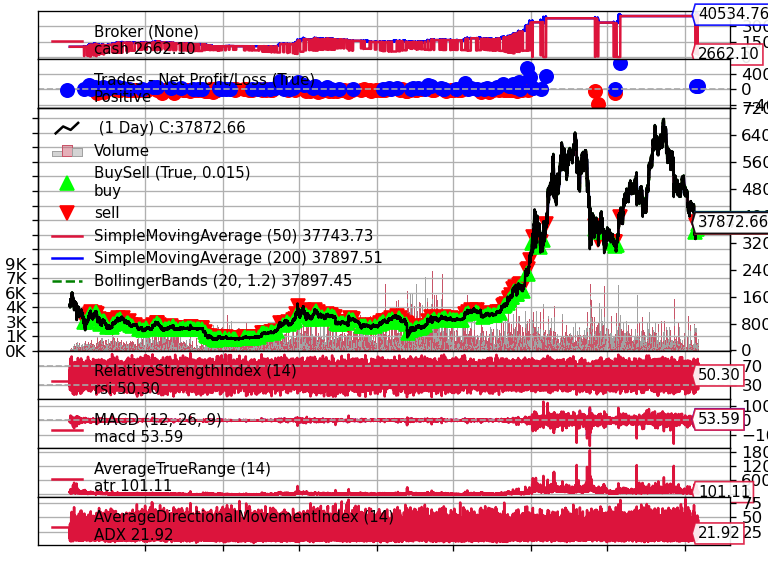

[[<Figure size 640x480 with 8 Axes>]]

In [132]:
cerebro.plot()
